In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\L470\Desktop\VEHICLE1 (1).xlsx")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

First 5 rows of data:

In [4]:
print("First 5 rows of data:\n", df.head())

First 5 rows of data:
       MAKE                          TYPE  YEAR  SELL_PRICE  KM_DRIVEN  \
0   Maruti        Maruti Swift Dzire VDI  2014      450000     145500   
1    Skoda  Skoda Rapid 1.5 TDI Ambition  2014      370000     120000   
2    Honda      Honda City 2017-2020 EXi  2006      158000     140000   
3  Hyundai     Hyundai i20 Sportz Diesel  2010      225000     127000   
4   Maruti        Maruti Swift VXI BSIII  2007      130000     120000   

  FUEL_TYPE SELLER_TYPE TRANSMISSION         OWNER  SEATS  KM_LITTER  \
0    Diesel  Individual       Manual   First Owner    5.0      23.40   
1    Diesel  Individual       Manual  Second Owner    5.0      21.14   
2    Petrol  Individual       Manual   Third Owner    5.0      17.70   
3    Diesel  Individual       Manual   First Owner    5.0      23.00   
4    Petrol  Individual       Manual   First Owner    5.0      16.10   

   ENGINE_CC  HORSE_POWER  
0     1248.0        74.00  
1     1498.0       103.52  
2     1497.0        7

In [5]:
print("\nShape of dataset:", df.shape)


Shape of dataset: (8128, 13)


In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 MAKE              0
TYPE              0
YEAR              0
SELL_PRICE        0
KM_DRIVEN         0
FUEL_TYPE         0
SELLER_TYPE       0
TRANSMISSION      0
OWNER             0
SEATS           221
KM_LITTER       221
ENGINE_CC       221
HORSE_POWER     216
dtype: int64


In [7]:
df["SEATS"].fillna(df["SEATS"].mode()[0], inplace=True)
df["KM_LITTER"].fillna(df["KM_LITTER"].median(), inplace=True)
df["ENGINE_CC"].fillna(df["ENGINE_CC"].median(), inplace=True)
df["HORSE_POWER"].fillna(df["HORSE_POWER"].median(), inplace=True)


C:\Users\L470\AppData\Local\Temp\ipykernel_4384\4214783261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SEATS"].fillna(df["SEATS"].mode()[0], inplace=True)
C:\Users\L470\AppData\Local\Temp\ipykernel_4384\4214783261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [8]:
print(df.isnull().sum())


MAKE            0
TYPE            0
YEAR            0
SELL_PRICE      0
KM_DRIVEN       0
FUEL_TYPE       0
SELLER_TYPE     0
TRANSMISSION    0
OWNER           0
SEATS           0
KM_LITTER       0
ENGINE_CC       0
HORSE_POWER     0
dtype: int64


Most cars listed are affordable/used cars FEW are new luxury models.

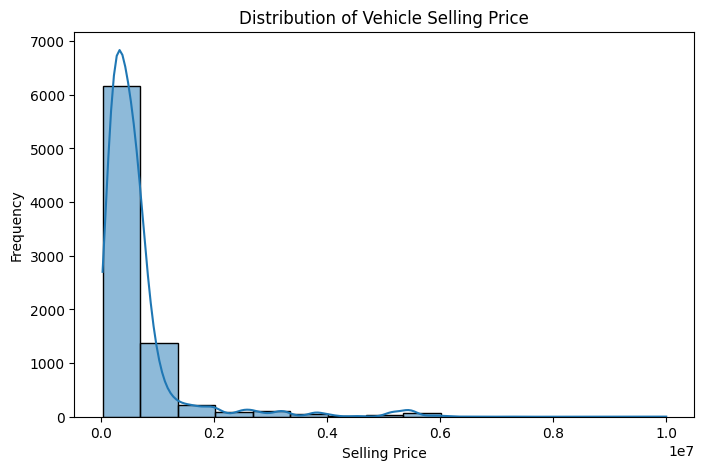

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["SELL_PRICE"], kde=True, bins=15)
plt.title("Distribution of Vehicle Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


Manual cars dominate market

C:\Users\L470\AppData\Local\Temp\ipykernel_4384\4265648121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="TRANSMISSION", palette="Set1")


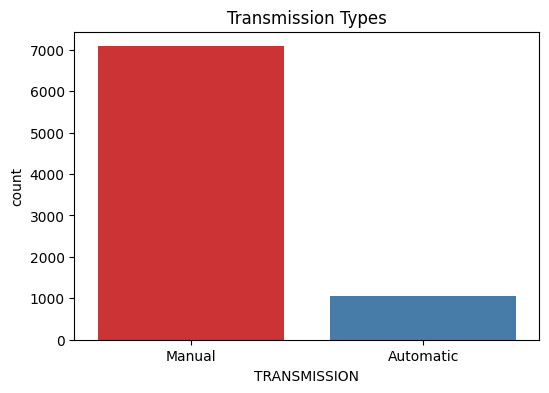

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="TRANSMISSION", palette="Set1")
plt.title("Transmission Types")
plt.show()


1-Newer cars fetch higher selling prices.

2-Higher engine CC linked to higher prices.

3-Automatic cars often sell at premium.

4-Selling price declines with more kilometers driven.

5-Diesel and Petrol dominate across all variables.

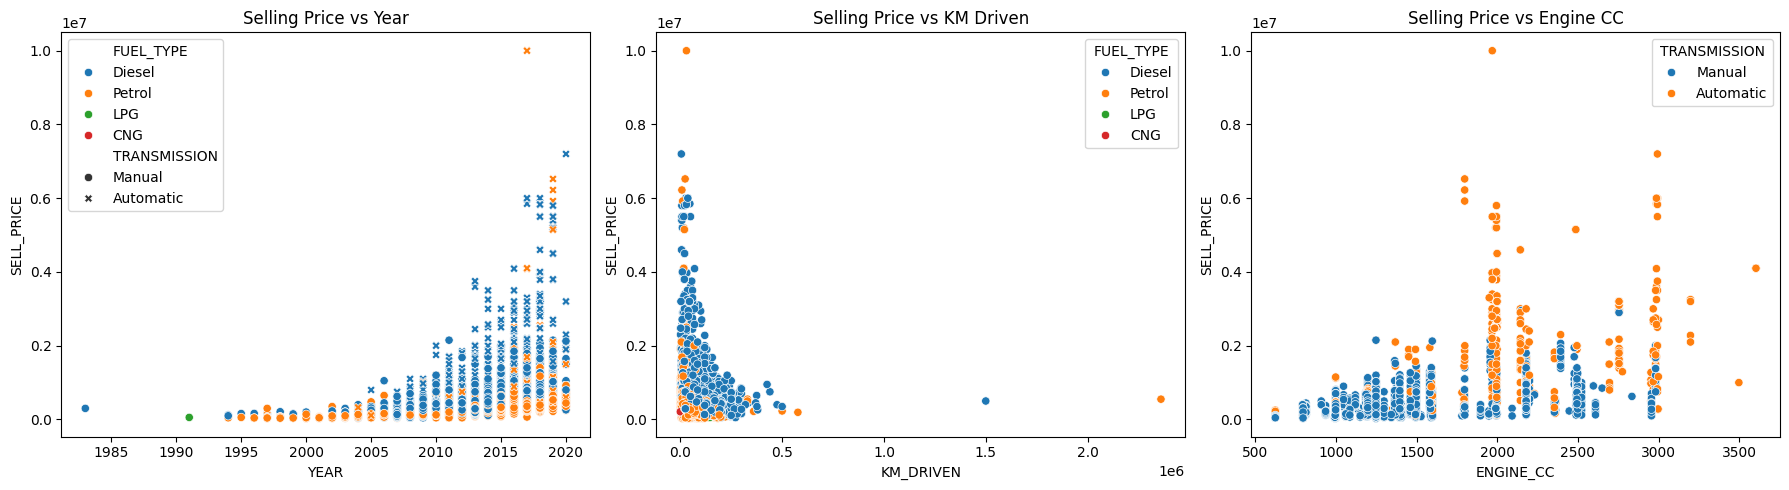

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4.1 Selling Price vs Year
sns.scatterplot(data=df, x="YEAR", y="SELL_PRICE", hue="FUEL_TYPE", style="TRANSMISSION", ax=axes[0])
axes[0].set_title("Selling Price vs Year")

# 4.2 Selling Price vs KM Driven
sns.scatterplot(data=df, x="KM_DRIVEN", y="SELL_PRICE", hue="FUEL_TYPE", ax=axes[1])
axes[1].set_title("Selling Price vs KM Driven")

# 4.3 Selling Price vs Engine CC
sns.scatterplot(data=df, x="ENGINE_CC", y="SELL_PRICE", hue="TRANSMISSION", ax=axes[2])
axes[2].set_title("Selling Price vs Engine CC")

# Adjust layout
plt.tight_layout()
plt.show()


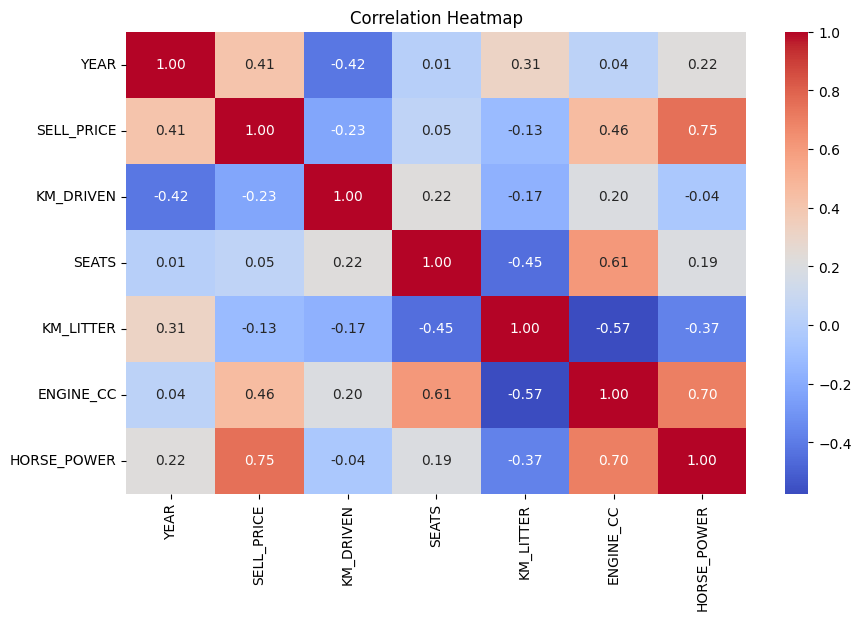

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Diesel and Petrol cars generally have higher selling prices compared to LPG and CNG cars, which are valued lower.


Cars with fewer previous owners (First Owner) have higher selling prices, while prices decline with multiple ownerships. 

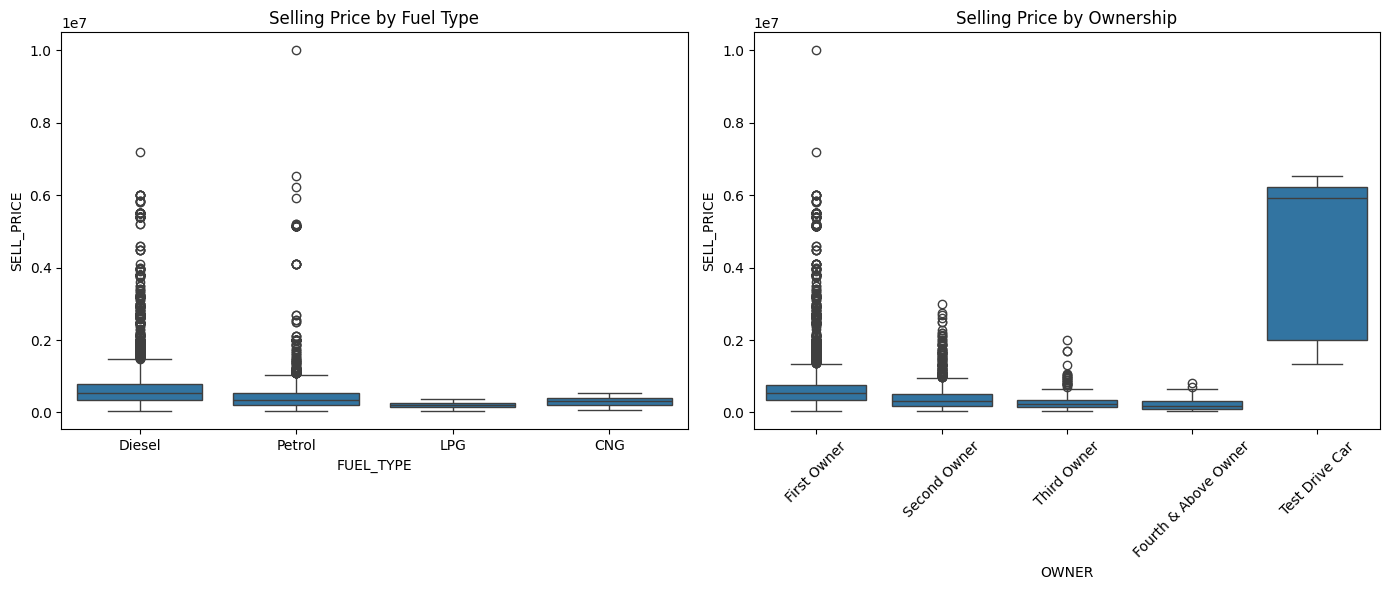

In [14]:


# Create 1 row, 2 columns for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 6.1 Selling Price by Fuel Type
sns.boxplot(data=df, x="FUEL_TYPE", y="SELL_PRICE", ax=axes[0])
axes[0].set_title("Selling Price by Fuel Type")

# 6.2 Selling Price by Ownership
sns.boxplot(data=df, x="OWNER", y="SELL_PRICE", ax=axes[1])
axes[1].set_title("Selling Price by Ownership")
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing
plt.tight_layout()
plt.show()


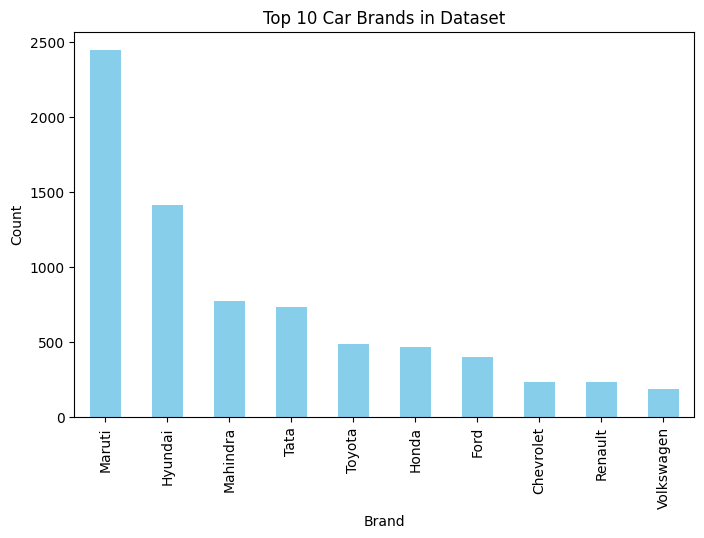

In [15]:
df["MAKE"].value_counts().head(10).plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Top 10 Car Brands in Dataset")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


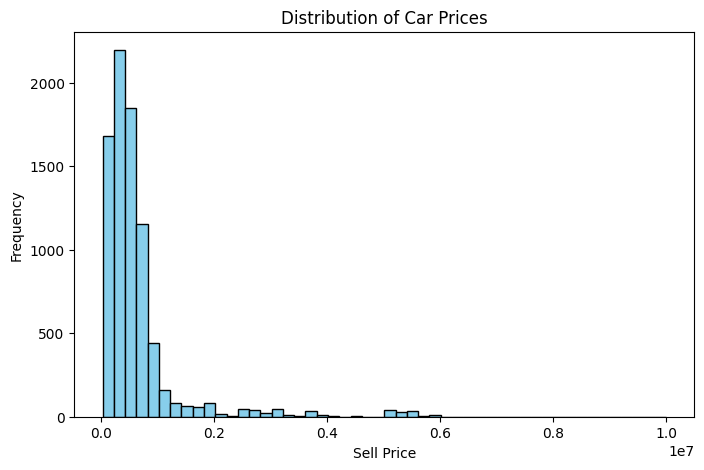

In [16]:
# Histogram of SELL_PRICE
plt.figure(figsize=(8,5))
plt.hist(df["SELL_PRICE"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Car Prices")
plt.xlabel("Sell Price")
plt.ylabel("Frequency")
plt.show()

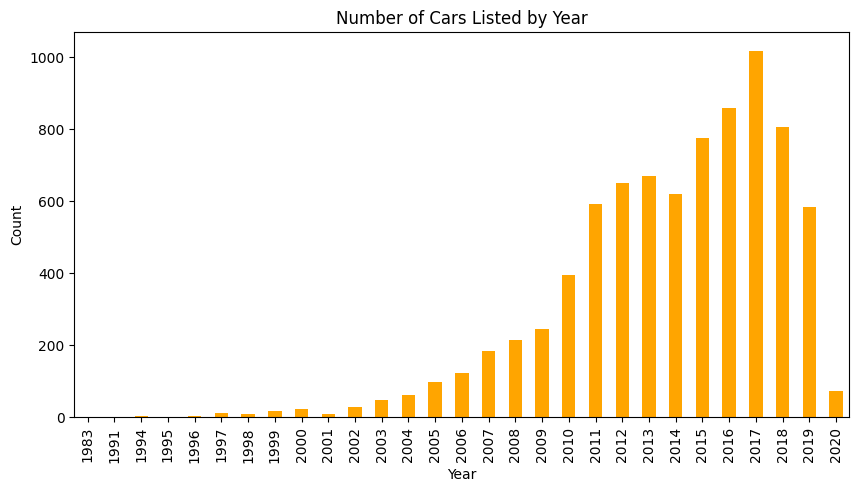

In [17]:
# Count of cars by YEAR
plt.figure(figsize=(10,5))
df["YEAR"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Number of Cars Listed by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 👉 This helps analyze if newer or older models are more common in the dataset.


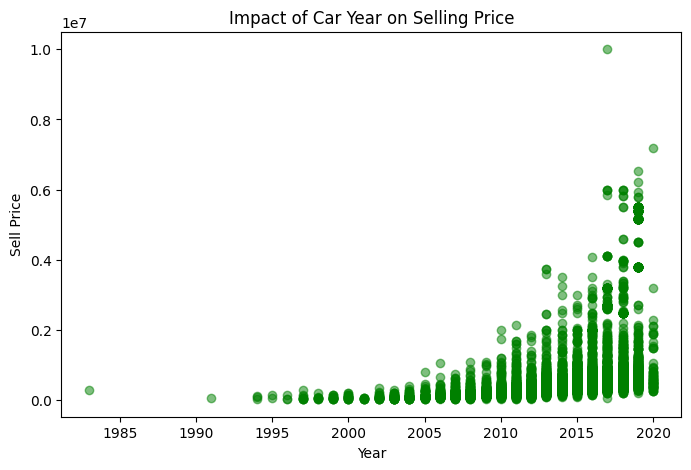

In [18]:
# Scatter plot: YEAR vs SELL_PRICE
plt.figure(figsize=(8,5))
plt.scatter(df["YEAR"], df["SELL_PRICE"], alpha=0.5, color="green")
plt.title("Impact of Car Year on Selling Price")
plt.xlabel("Year")
plt.ylabel("Sell Price")
plt.show()

# 👉 A scatter plot between YEAR and SELL_PRICE shows depreciation trends over time.


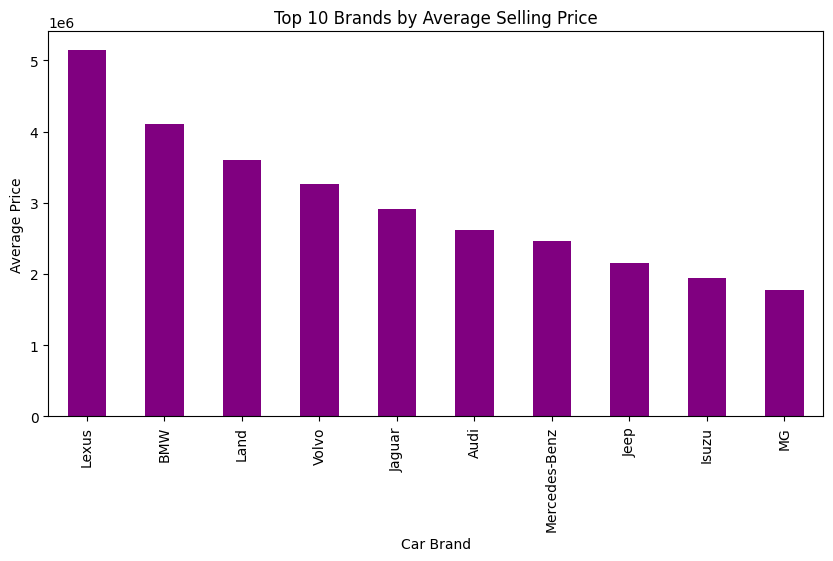

In [19]:
import matplotlib.pyplot as plt

avg_price_brand = df.groupby("MAKE")["SELL_PRICE"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
avg_price_brand.plot(kind="bar", color="purple")
plt.title("Top 10 Brands by Average Selling Price")
plt.xlabel("Car Brand")
plt.ylabel("Average Price")
plt.show()

# 👉 This reveals which brands dominate the premium segment (e.g., BMW, Mercedes) vs budget-friendly ones.


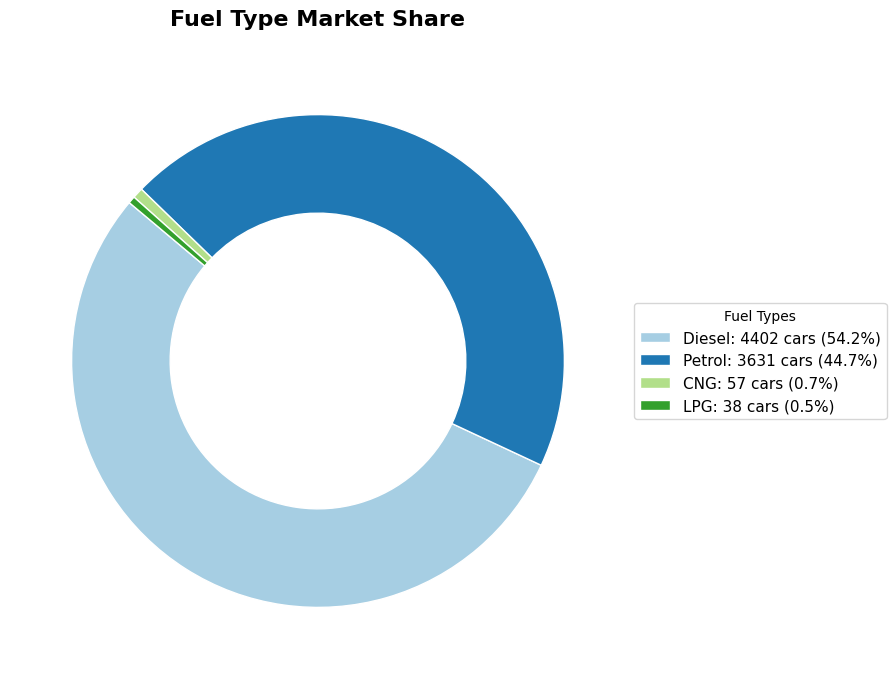

In [20]:
"""
====================================
🍩 FUEL TYPE MARKET SHARE (Donut Chart with Side Labels)
====================================
"""

import matplotlib.pyplot as plt

# Count fuel types
fuel_counts = df["FUEL_TYPE"].value_counts().sort_values(ascending=False)

# Donut chart (without percentages inside)
plt.figure(figsize=(8,8))
wedges, texts = plt.pie(
    fuel_counts,
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(width=0.4, edgecolor="white")
)

# Add a legend on the side with percentages
plt.legend(
    wedges,
    [f"{label}: {count} cars ({count/sum(fuel_counts)*100:.1f}%)"
     for label, count in zip(fuel_counts.index, fuel_counts)],
    title="Fuel Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=11
)

plt.title("Fuel Type Market Share", fontsize=16, fontweight="bold", pad=20)
plt.show()

